# 📊 Telco Customer Churn — Exploratory Data Analysis

## 📋 Problem Context

> **Customer churn directly impacts revenue and growth in subscription-based businesses.**

The objective of this analysis is to identify patterns and drivers associated with customer churn, and build a model that prioritizes high recall for churn customers.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/telco_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [3]:
df["Churn"].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

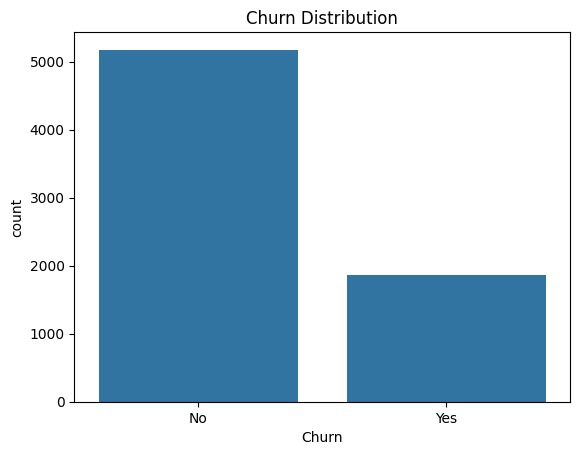

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()


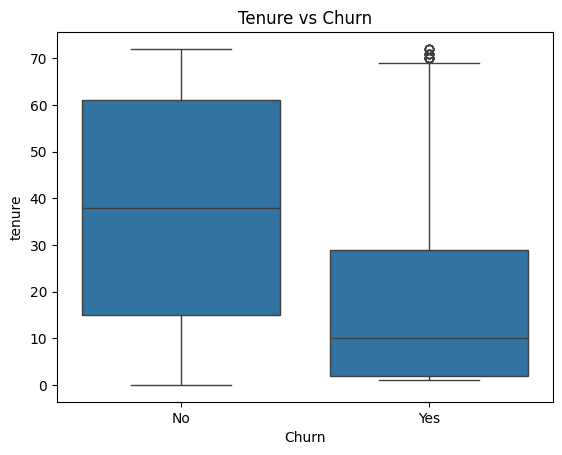

In [5]:
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()


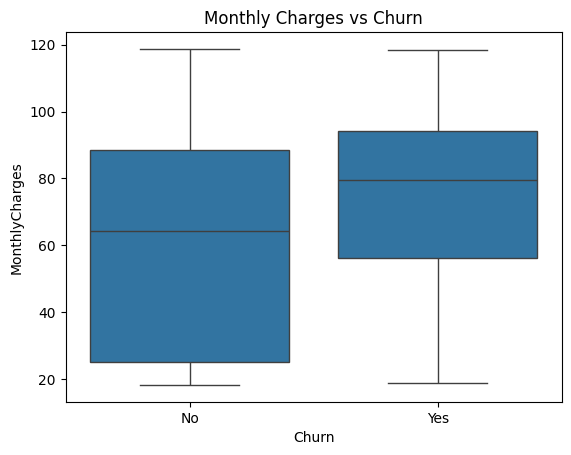

In [6]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()


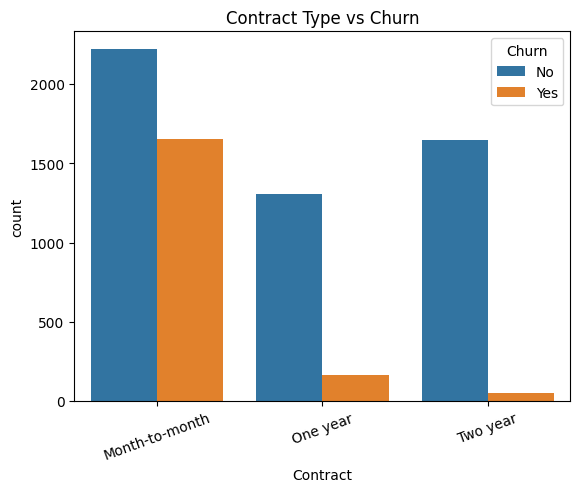

In [7]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.xticks(rotation=20)
plt.title("Contract Type vs Churn")
plt.show()


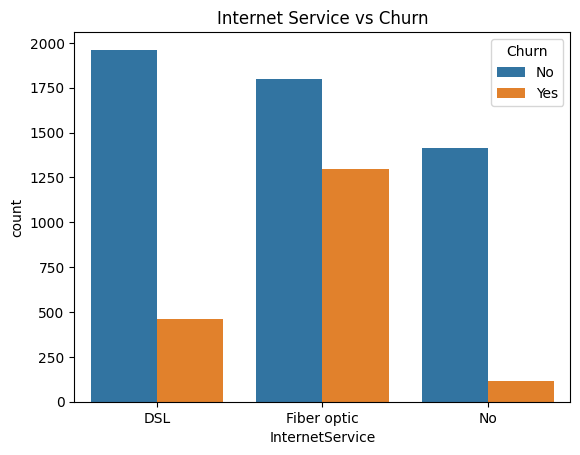

In [8]:
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.show()


In [11]:
import joblib
from sklearn.model_selection import train_test_split

# Clean data
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Load pre-trained pipeline
pipeline = joblib.load("../models/churn_pipeline.pkl")

# Prepare target variable
y = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["customerID", "Churn"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Get probabilities for test set
lr_probs = pipeline.predict_proba(X_test)[:, 1]


c:\Users\AR\telco-customer-churn\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\AR\telco-customer-churn\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.1.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\AR\telco-customer-churn\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.4.1.

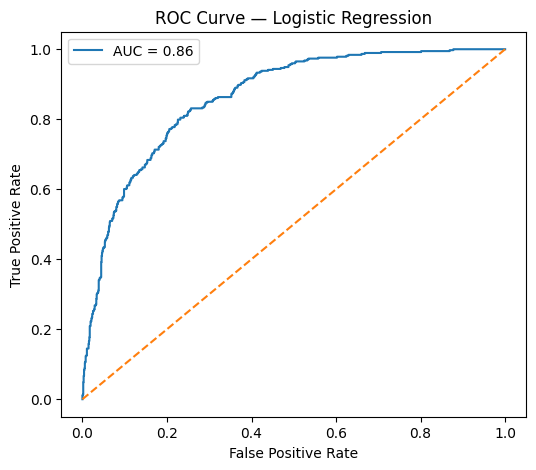

In [12]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()


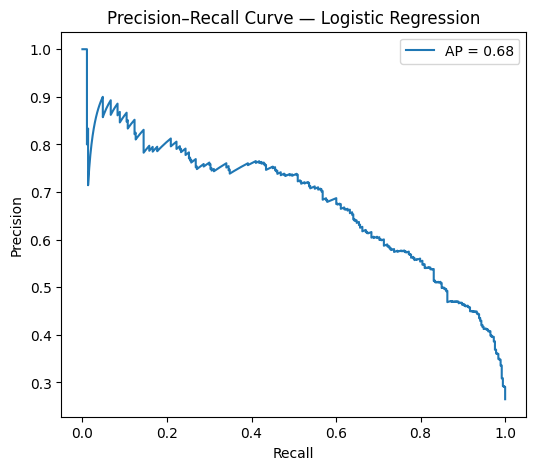

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
ap = average_precision_score(y_test, lr_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.legend()
plt.show()


In [14]:
import pandas as pd

threshold_df = pd.DataFrame({
    "Threshold": thresholds,
    "Precision": precision[:-1],
    "Recall": recall[:-1]
})

threshold_df.head()


,Threshold,Precision,Recall
0,0.003837,0.264727,1.0
1,0.003957,0.264915,1.0
2,0.004119,0.265103,1.0
3,0.004318,0.265292,1.0
4,0.004411,0.265480,1.0


# 📊 Final EDA & Modeling Summary

## 🎯 Key Business Insights

| Finding                                    | Impact                           |
| ------------------------------------------ | -------------------------------- |
| 👥 Short tenure + Month-to-month contracts | **Highest churn risk**           |
| 💰 Higher monthly charges                  | **Strong churn correlation**     |
| 📋 Contract duration                       | **Strongest retention lever**    |
| 🎲 Recall optimization                     | **Critical for churn detection** |

---

## 🤖 Modeling Takeaways

### Logistic Regression Model

- ✅ Strong performance on test data
- ✅ High interpretability (feature coefficients)
- ✅ Production-ready stability

### Performance Optimization

- 📈 Precision-Recall analysis for threshold tuning
- 🎯 Optimized for recall (minimize false negatives)
- ✨ Suitable for proactive retention strategies

> **Next Steps:** Deploy model to production retention pipeline
